# K-Menas Clustering

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [3]:
scaling_data = pd.read_csv("./data/scaling_data.csv")
sales_data = pd.read_csv('./data/sales_data.csv')

In [4]:
scaling_data = scaling_data.drop(['Unnamed: 0'], axis=1)

In [5]:
scaling_data

,상권_구분_코드_명,상권_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,집객시설_수,관공서_수,은행_수,...,일반_병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
0,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.001176,0.0,0.057336,0.047619,0.126984,...,0.0,0.069767,1.0,0.0,0.000000,0.0,0.173077,0.0,0.070107,0.070260
1,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.001176,0.0,0.057336,0.047619,0.126984,...,0.0,0.069767,1.0,0.0,0.000000,0.0,0.173077,0.0,0.077951,0.080686
2,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.001176,0.0,0.057336,0.047619,0.126984,...,0.0,0.069767,1.0,0.0,0.000000,0.0,0.173077,0.0,0.077503,0.075824
3,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.001176,0.0,0.057336,0.047619,0.126984,...,0.0,0.069767,1.0,0.0,0.000000,0.0,0.173077,0.0,0.083390,0.084133
4,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.001176,0.0,0.087690,0.190476,0.158730,...,0.0,0.046512,1.0,0.0,0.117647,0.0,0.269231,0.0,0.070107,0.070260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19846,전통시장,"동원전통종합시장(동원시장, 동원전통시장 상점가)",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.048877,0.039122
19847,전통시장,"이화여대 3,5,7길 상점가",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.017757,0.019326
19848,전통시장,"이화여대 3,5,7길 상점가",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.023586,0.027619
19849,전통시장,"이화여대 3,5,7길 상점가",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.020424,0.022618


In [49]:
scaling_data.to_csv('./data/scaling_data.csv')

In [6]:
sales_data=sales_data.drop(['Unnamed: 0'], axis=1)

In [50]:
sales_data
sales_data.to_csv('./data/sales_data.csv')

In [8]:
num_columns = ['총_상주인구_수','분기당_매출_금액']
# num_data = scaling_data[num_columns].groupby(scaling_data['상권_코드_명']).mean()
num_data=scaling_data[num_columns]
# num_data = scaling_data[num_columns]

In [9]:
num_data

,총_상주인구_수,분기당_매출_금액
0,0.001176,0.070107
1,0.001176,0.077951
2,0.001176,0.077503
3,0.001176,0.083390
4,0.001176,0.070107
...,...,...
19846,0.000000,0.048877
19847,0.000000,0.017757
19848,0.000000,0.023586
19849,0.000000,0.020424


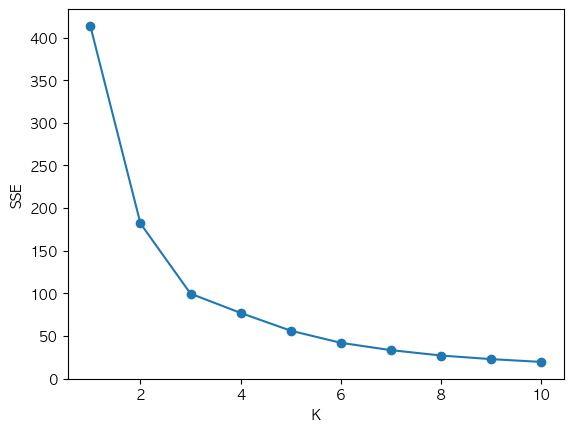

In [11]:
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(num_data)

In [13]:
best_n = 1 
best_score = -1

for n_cluster in range(3, 11): 
  kmeans = KMeans(n_clusters=n_cluster) 
  kmeans.fit(num_data) 
  cluster = kmeans.predict(num_data) 
  score = silhouette_score(num_data, cluster)

  print('k = {} 일 때의 실루엣 점수 : {:.2f}'.format(n_cluster, score))

  if score > best_score :
      best_n = n_cluster
      best_score = score

print('k = {} 일 때 가장 높은 실루엣 점수 {:.2f}을 얻는다'.format(best_n, best_score))

k = 3 일 때의 실루엣 점수 : 0.74
k = 4 일 때의 실루엣 점수 : 0.74
k = 5 일 때의 실루엣 점수 : 0.71
k = 6 일 때의 실루엣 점수 : 0.72
k = 7 일 때의 실루엣 점수 : 0.70
k = 8 일 때의 실루엣 점수 : 0.71
k = 9 일 때의 실루엣 점수 : 0.74
k = 10 일 때의 실루엣 점수 : 0.73
k = 4 일 때 가장 높은 실루엣 점수 0.74을 얻는다


In [14]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
num_data['cluster'] = kmeans.fit_predict(num_data)

Text(0, 0.5, '표준 데이터 값')

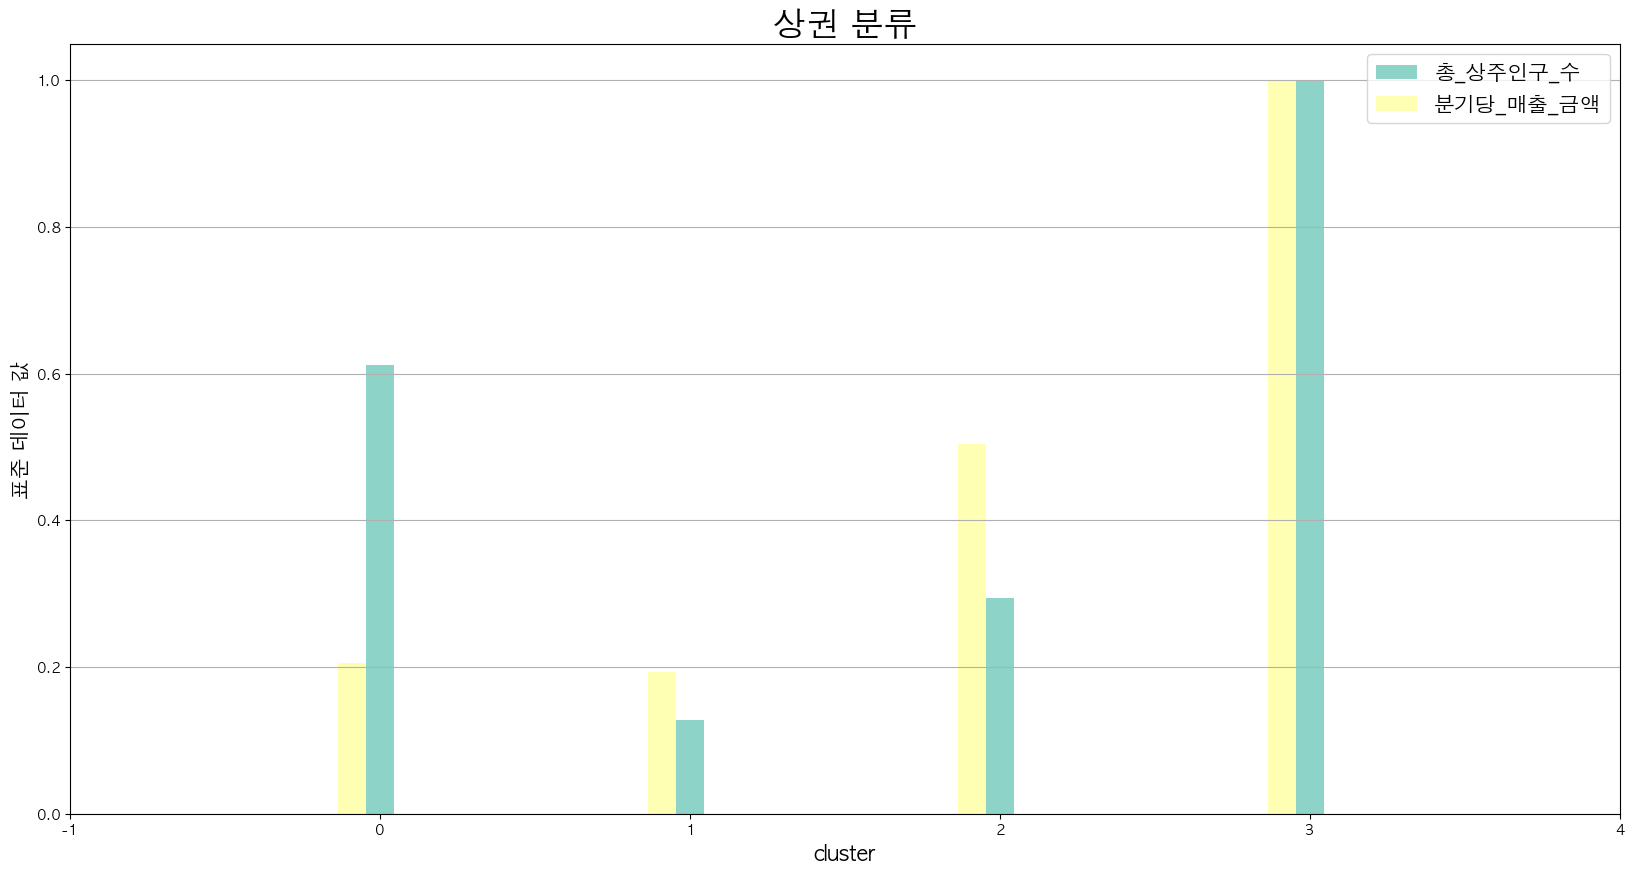

In [15]:
plt.rcParams['figure.figsize'] = (20, 10)
color = sns.color_palette("Set3", len(num_data.columns))

for idx, column in enumerate(num_columns):
  plt.bar(num_data['cluster'] - idx * 0.09, num_data[column], label=column, width=0.09, color=color[idx])

plt.title('상권 분류', fontsize=24)
plt.legend(fontsize=15)
plt.grid(True, axis='y')
plt.xticks([-1, 0, 1, 2, 3, 4])
plt.xlabel('cluster', fontsize=15)
plt.ylabel('표준 데이터 값', fontsize=15)

In [16]:
k = 4
model = KMeans(n_clusters = k, random_state = 10)
model.fit(num_data)
yhat = model.fit_predict(num_data)

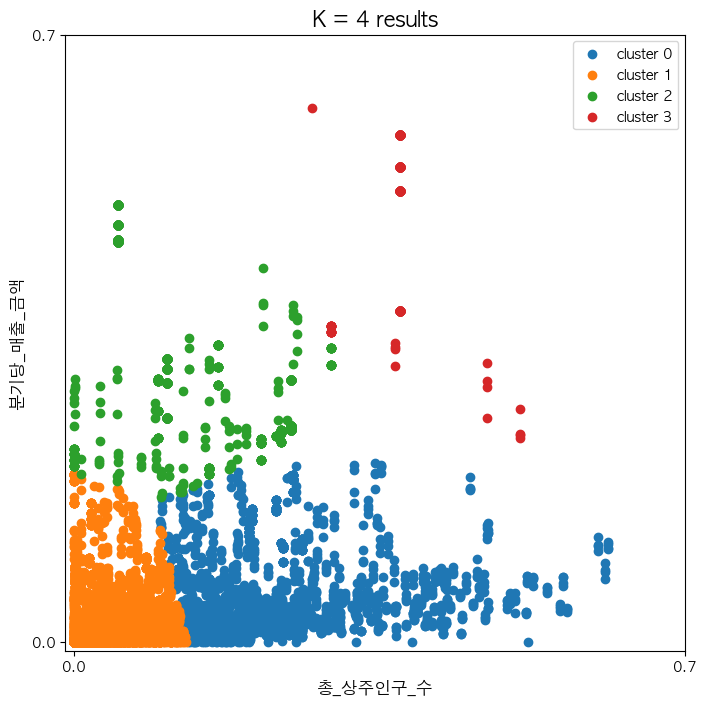

In [19]:
plt.figure(figsize = (8,8))

for i in range(k):
    plt.scatter(num_data.loc[num_data['cluster'] == i, '총_상주인구_수'], 
                num_data.loc[num_data['cluster'] == i, '분기당_매출_금액'], 
                label = 'cluster ' + str(i))
    
plt.legend()
plt.title('K = %d results'%k, size = 15)
plt.xlabel('총_상주인구_수', size = 12)
plt.ylabel('분기당_매출_금액', size = 12)
plt.xlim([-0.01, 0.7])
plt.xticks([0, 0.7])
plt.ylim([-0.01, 0.7])
plt.yticks([0, 0.7])
plt.show()

In [92]:
area3 = num_data[num_data['cluster'] == 3]
area3

,총_상주인구_수,분기당_매출_금액,cluster
0,0.001176,0.070107,3
1,0.001176,0.077951,3
2,0.001176,0.077503,3
3,0.001176,0.083390,3
4,0.001176,0.070107,3
...,...,...,...
19745,0.000000,0.193548,3
19746,0.000000,0.159918,3
19747,0.000000,0.191809,3
19748,0.000000,0.216012,3


In [20]:
num_columns2 = ['집객시설_수','교통시설_수']
# num_data = scaling_data[num_columns].groupby(scaling_data['상권_코드_명']).mean()
num_data2=scaling_data[num_columns2]
# num_data = scaling_data[num_columns]

In [21]:
num_data2

,집객시설_수,교통시설_수
0,0.057336,0.173077
1,0.057336,0.173077
2,0.057336,0.173077
3,0.057336,0.173077
4,0.087690,0.269231
...,...,...
19846,0.000000,0.000000
19847,0.000000,0.000000
19848,0.000000,0.000000
19849,0.000000,0.000000


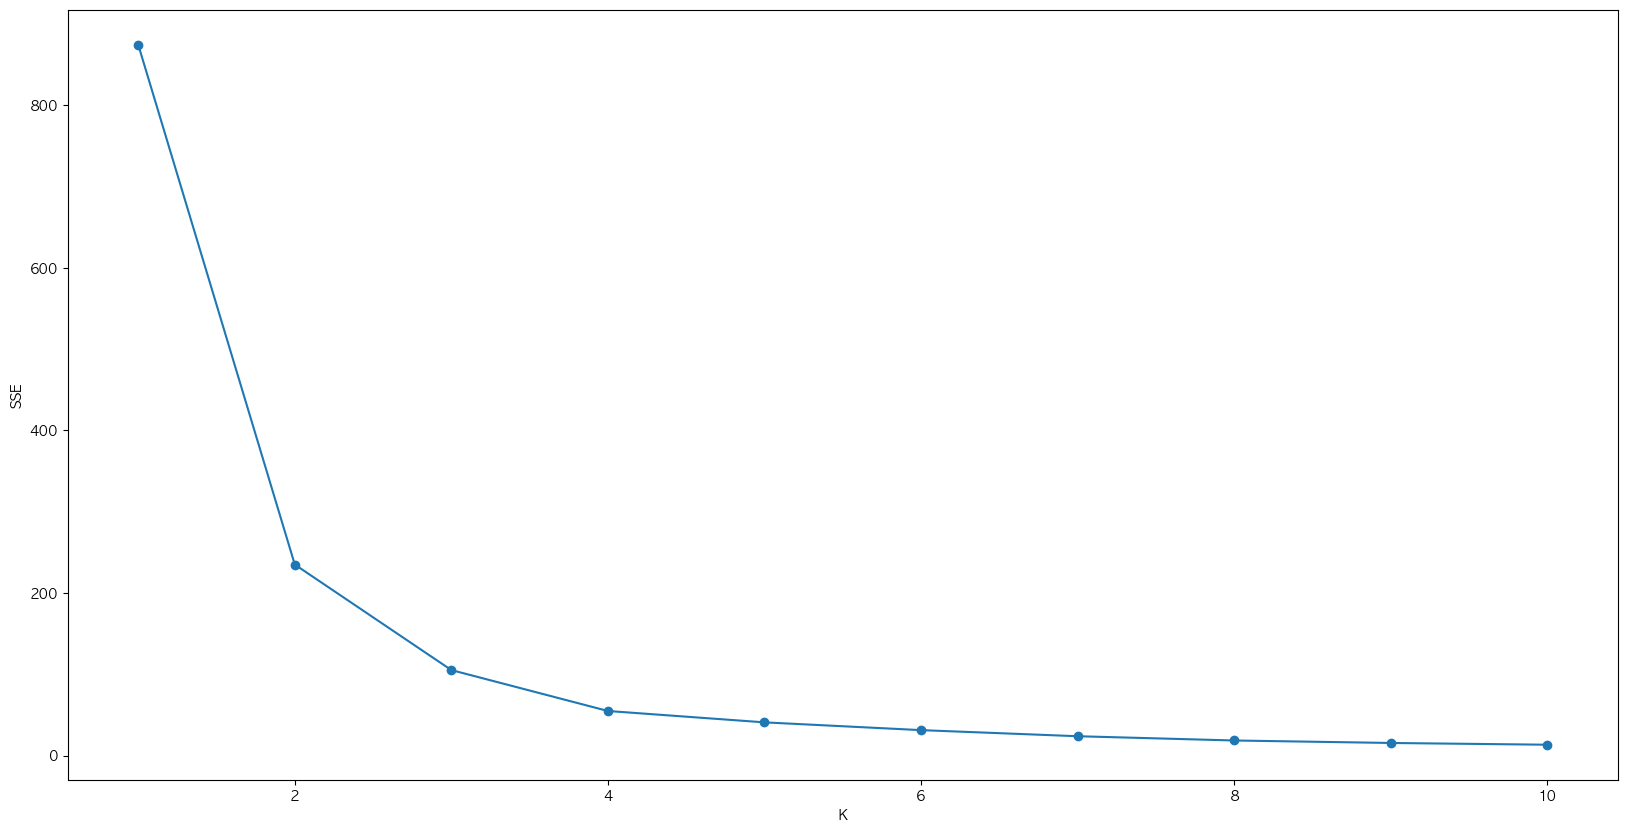

In [22]:
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(num_data2)

In [23]:
best_n = 1 
best_score = -1

for n_cluster in range(2, 11): 
  kmeans = KMeans(n_clusters=n_cluster) 
  kmeans.fit(num_data2) 
  cluster = kmeans.predict(num_data2) 
  score = silhouette_score(num_data2, cluster)

  print('k = {} 일 때의 실루엣 점수 : {:.2f}'.format(n_cluster, score))

  if score > best_score :
      best_n = n_cluster
      best_score = score

print('k = {} 일 때 가장 높은 실루엣 점수 {:.2f}을 얻는다'.format(best_n, best_score))

k = 2 일 때의 실루엣 점수 : 0.88
k = 3 일 때의 실루엣 점수 : 0.86
k = 4 일 때의 실루엣 점수 : 0.71
k = 5 일 때의 실루엣 점수 : 0.61
k = 6 일 때의 실루엣 점수 : 0.62
k = 7 일 때의 실루엣 점수 : 0.62
k = 8 일 때의 실루엣 점수 : 0.59
k = 9 일 때의 실루엣 점수 : 0.60
k = 10 일 때의 실루엣 점수 : 0.58
k = 2 일 때 가장 높은 실루엣 점수 0.88을 얻는다


In [32]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
cluster = kmeans.fit_predict(num_data2)
cluster

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [33]:
num_data2['cluster'] = cluster

Text(0, 0.5, '표준 데이터 값')

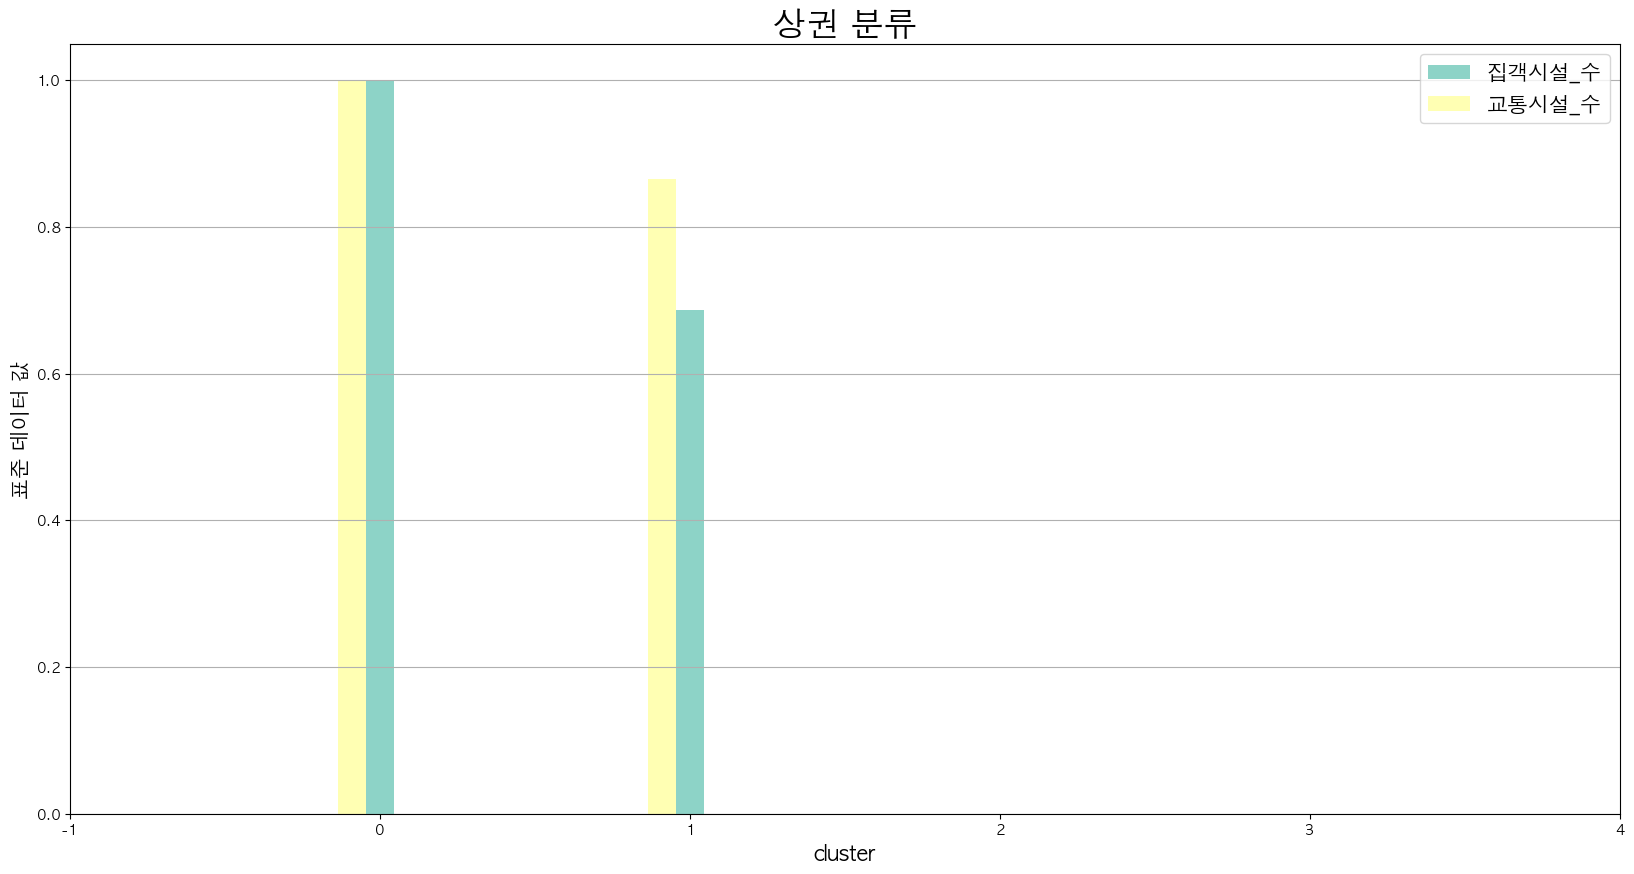

In [34]:
plt.rcParams['figure.figsize'] = (20, 10)
color = sns.color_palette("Set3", len(num_data2.columns))

for idx, column in enumerate(num_columns2):
  plt.bar(num_data2['cluster'] - idx * 0.09, num_data2[column], label=column, width=0.09, color=color[idx])

plt.title('상권 분류', fontsize=24)
plt.legend(fontsize=15)
plt.grid(True, axis='y')
plt.xticks([-1, 0, 1, 2, 3, 4])
plt.xlabel('cluster', fontsize=15)
plt.ylabel('표준 데이터 값', fontsize=15)

In [35]:
k = 2
model = KMeans(n_clusters = k, random_state = 10)
model.fit(num_data2)
yhat = model.fit_predict(num_data2)

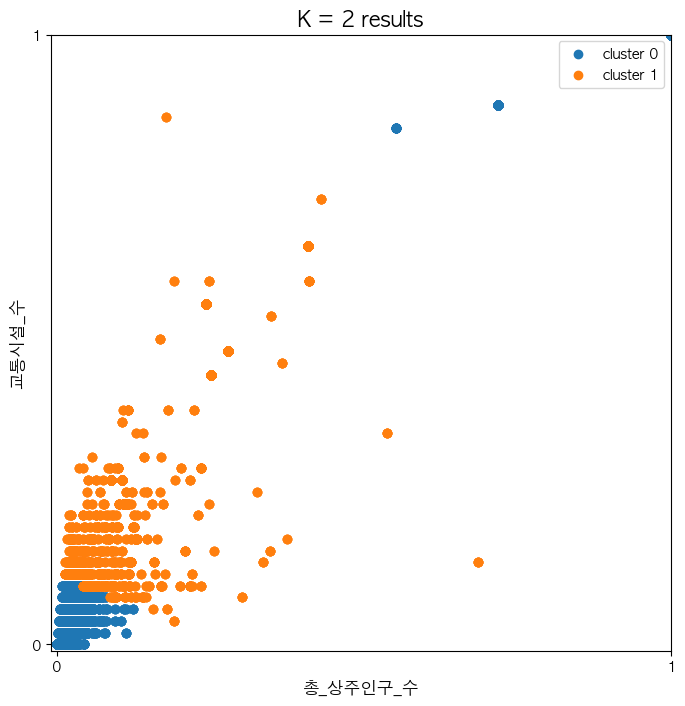

In [36]:
plt.figure(figsize = (8,8))

for i in range(k):
    plt.scatter(num_data2.loc[num_data2['cluster'] == i, '집객시설_수'], 
                num_data2.loc[num_data2['cluster'] == i, '교통시설_수'], 
                label = 'cluster ' + str(i))
    
plt.legend()
plt.title('K = %d results'%k, size = 15)
plt.xlabel('총_상주인구_수', size = 12)
plt.ylabel('교통시설_수', size = 12)
plt.xlim([-0.01, 1])
plt.xticks([0, 1])
plt.ylim([-0.01, 1])
plt.yticks([0, 1])
plt.show()

In [93]:
area1 = num_data2[num_data2['cluster'] == 1]
area1

,집객시설_수,교통시설_수,cluster
0,0.057336,0.173077,1
1,0.057336,0.173077,1
2,0.057336,0.173077,1
3,0.057336,0.173077,1
4,0.087690,0.269231,1
...,...,...,...
19745,0.053963,0.115385,1
19746,0.053963,0.115385,1
19747,0.053963,0.115385,1
19748,0.053963,0.115385,1


### 결과

In [51]:
area3.to_csv('./data/area3.csv')

In [94]:
area3

,총_상주인구_수,분기당_매출_금액,cluster
0,0.001176,0.070107,3
1,0.001176,0.077951,3
2,0.001176,0.077503,3
3,0.001176,0.083390,3
4,0.001176,0.070107,3
...,...,...,...
19745,0.000000,0.193548,3
19746,0.000000,0.159918,3
19747,0.000000,0.191809,3
19748,0.000000,0.216012,3


In [95]:
area3_data = pd.merge(area3, scaling_data, how='inner')
area3_data=area3_data.drop_duplicates()

In [96]:
area3_data=area3_data.drop_duplicates(['상권_코드_명'])
area3_data

,총_상주인구_수,분기당_매출_금액,cluster,상권_구분_코드_명,상권_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,아파트_단지_수,집객시설_수,...,종합병원_수,일반_병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_건수
0,0.001176,0.070107,3,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.000000,0.057336,...,0.0,0.0,0.069767,1.0,0.000000,0.000000,0.000000,0.173077,0.0,0.070260
25600,0.248747,0.191306,3,관광특구,이태원 관광특구,0.442833,0.055700,0.237624,0.093833,0.242833,...,0.0,0.0,0.069767,0.0,0.000000,0.117647,0.277778,0.557692,0.0,0.154632
35200,0.000000,0.000000,3,골목상권,가로공원로58길,0.000000,0.000868,0.000000,0.000000,0.003373,...,0.0,0.0,0.023256,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
35208,0.000000,0.000000,3,골목상권,가로공원로76가길,0.000000,0.001603,0.000000,0.000000,0.010118,...,0.0,0.0,0.023256,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
35216,0.000000,0.000000,3,골목상권,가로공원로80길,0.000000,0.002576,0.000000,0.000000,0.005059,...,0.0,0.0,0.046512,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15633473,0.022732,0.000000,3,전통시장,영천시장,0.000000,0.000334,0.000000,0.007941,0.028668,...,0.0,0.0,0.046512,0.0,0.000000,0.000000,0.000000,0.115385,0.0,0.000000
15633497,0.042741,0.010090,3,전통시장,정릉시장,0.000000,0.001250,0.000000,0.024749,0.033727,...,0.0,0.0,0.093023,0.0,0.000000,0.000000,0.000000,0.096154,0.0,0.007909
15633593,0.024592,0.000000,3,전통시장,정릉아리랑시장,0.000000,0.000210,0.000000,0.009397,0.026981,...,0.0,0.0,0.046512,0.0,0.000000,0.000000,0.000000,0.173077,0.0,0.000000
15633617,0.058047,0.005072,3,전통시장,창동골목시장,0.000000,0.000801,0.000000,0.010588,0.028668,...,0.0,0.0,0.046512,0.0,0.000000,0.000000,0.000000,0.115385,0.0,0.004020


In [53]:
area1.to_csv('./data/area1.csv')

In [54]:
area1

,집객시설_수,교통시설_수,cluster
0,0.057336,0.173077,1
1,0.057336,0.173077,1
2,0.057336,0.173077,1
3,0.057336,0.173077,1
4,0.087690,0.269231,1
...,...,...,...
19745,0.053963,0.115385,1
19746,0.053963,0.115385,1
19747,0.053963,0.115385,1
19748,0.053963,0.115385,1


In [97]:
area1_data = pd.merge(area1, scaling_data, how='inner')

In [98]:
area1_data=area1_data.drop_duplicates()

In [99]:
area1_data=area1_data.drop_duplicates(['상권_코드_명'])

In [101]:
area1_data

,집객시설_수,교통시설_수,cluster,상권_구분_코드_명,상권_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,...,종합병원_수,일반_병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
0,0.057336,0.173077,1,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.001176,0.000000,...,0.000000,0.00,0.069767,1.0,0.000000,0.000000,0.000000,0.000000,0.070107,0.070260
120,0.057336,0.173077,1,발달상권,코엑스,0.000000,0.151712,0.000000,0.000986,0.000000,...,0.000000,0.00,0.069767,1.0,0.000000,0.000000,0.000000,0.000000,0.031661,0.036412
65824,0.251265,0.442308,1,관광특구,동대문패션타운 관광특구,0.814572,0.057751,0.366337,0.106709,0.013367,...,0.333333,0.25,0.348837,0.0,0.333333,0.000000,0.013889,0.454545,0.257722,0.227106
65944,0.251265,0.442308,1,관광특구,잠실 관광특구,0.818034,0.232519,0.524752,0.372847,0.034410,...,0.000000,0.00,0.325581,0.0,0.000000,0.000000,0.000000,0.090909,0.519069,0.360692
163424,0.242833,0.557692,1,관광특구,이태원 관광특구,0.442833,0.055700,0.237624,0.248747,0.093833,...,0.000000,0.00,0.069767,0.0,0.000000,0.117647,0.277778,0.000000,0.191306,0.154632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282664,0.075885,0.096154,1,전통시장,동원시장,0.000000,0.002137,0.000000,0.000000,0.000000,...,0.000000,0.00,0.186047,0.0,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000
282722,0.190556,0.596154,1,발달상권,홍익대학교 주변,0.000000,0.083230,0.000000,0.000000,0.000000,...,0.000000,0.00,0.279070,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
282790,0.215852,0.096154,1,전통시장,서울약령시장,0.000000,0.011170,0.000000,0.101472,0.005823,...,0.000000,0.00,0.186047,0.0,0.000000,0.000000,0.027778,0.000000,0.007897,0.005671
283334,0.166948,0.250000,1,전통시장,영등포전통시장,0.000000,0.020290,0.000000,0.050507,0.003176,...,0.000000,0.00,0.302326,0.0,0.000000,0.000000,0.069444,0.000000,0.000000,0.000000


In [105]:
result = pd.merge(area3_data, area1_data, how='outer')
result

,총_상주인구_수,분기당_매출_금액,cluster,상권_구분_코드_명,상권_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,아파트_단지_수,집객시설_수,...,종합병원_수,일반_병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_건수
0,0.001176,0.070107,3,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.000000,0.057336,...,0.0,0.0,0.069767,1.0,0.000000,0.000000,0.000000,0.173077,0.0,0.070260
1,0.248747,0.191306,3,관광특구,이태원 관광특구,0.442833,0.055700,0.237624,0.093833,0.242833,...,0.0,0.0,0.069767,0.0,0.000000,0.117647,0.277778,0.557692,0.0,0.154632
2,0.000000,0.000000,3,골목상권,가로공원로58길,0.000000,0.000868,0.000000,0.000000,0.003373,...,0.0,0.0,0.023256,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,3,골목상권,가로공원로76가길,0.000000,0.001603,0.000000,0.000000,0.010118,...,0.0,0.0,0.023256,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,3,골목상권,가로공원로80길,0.000000,0.002576,0.000000,0.000000,0.005059,...,0.0,0.0,0.046512,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,0.000000,0.000000,1,전통시장,동원시장,0.000000,0.002137,0.000000,0.000000,0.075885,...,0.0,0.0,0.186047,0.0,0.444444,0.000000,0.000000,0.096154,0.0,0.000000
1610,0.000000,0.000000,1,발달상권,홍익대학교 주변,0.000000,0.083230,0.000000,0.000000,0.190556,...,0.0,0.0,0.279070,0.0,0.000000,0.000000,0.000000,0.596154,0.0,0.000000
1611,0.101472,0.007897,1,전통시장,서울약령시장,0.000000,0.011170,0.000000,0.005823,0.215852,...,0.0,0.0,0.186047,0.0,0.000000,0.000000,0.027778,0.096154,0.0,0.005671
1612,0.050507,0.000000,1,전통시장,영등포전통시장,0.000000,0.020290,0.000000,0.003176,0.166948,...,0.0,0.0,0.302326,0.0,0.000000,0.000000,0.069444,0.250000,0.0,0.000000


In [106]:
result = result.drop_duplicates()

In [107]:
result=result.drop_duplicates(['상권_코드_명'])

In [108]:
result

,총_상주인구_수,분기당_매출_금액,cluster,상권_구분_코드_명,상권_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,아파트_단지_수,집객시설_수,...,종합병원_수,일반_병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_건수
0,0.001176,0.070107,3,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.000000,0.057336,...,0.000000,0.00,0.069767,1.0,0.000000,0.000000,0.000000,0.173077,0.000000,0.070260
1,0.248747,0.191306,3,관광특구,이태원 관광특구,0.442833,0.055700,0.237624,0.093833,0.242833,...,0.000000,0.00,0.069767,0.0,0.000000,0.117647,0.277778,0.557692,0.000000,0.154632
2,0.000000,0.000000,3,골목상권,가로공원로58길,0.000000,0.000868,0.000000,0.000000,0.003373,...,0.000000,0.00,0.023256,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,3,골목상권,가로공원로76가길,0.000000,0.001603,0.000000,0.000000,0.010118,...,0.000000,0.00,0.023256,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,3,골목상권,가로공원로80길,0.000000,0.002576,0.000000,0.000000,0.005059,...,0.000000,0.00,0.046512,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,0.058047,0.005072,3,전통시장,창동골목시장,0.000000,0.000801,0.000000,0.010588,0.028668,...,0.000000,0.00,0.046512,0.0,0.000000,0.000000,0.000000,0.115385,0.000000,0.004020
1343,0.000000,0.159918,3,발달상권,가락시장,0.000000,0.000000,0.000000,0.000000,0.035413,...,0.000000,0.00,0.046512,0.0,0.111111,0.000000,0.000000,0.134615,0.000000,0.140274
1346,0.106709,0.257722,1,관광특구,동대문패션타운 관광특구,0.814572,0.057751,0.366337,0.013367,0.251265,...,0.333333,0.25,0.348837,0.0,0.333333,0.000000,0.013889,0.442308,0.454545,0.227106
1347,0.372847,0.519069,1,관광특구,잠실 관광특구,0.818034,0.232519,0.524752,0.034410,0.251265,...,0.000000,0.00,0.325581,0.0,0.000000,0.000000,0.000000,0.442308,0.090909,0.360692


In [109]:
result_columns= ['cluster','총_상주인구_수', '상권_구분_코드_명', '상권_코드_명', '총_생활인구_수',
       '총_직장_인구_수', '점포_수', '아파트_단지_수', '집객시설_수','교통시설_수',
       '학교_수','분기당_매출_금액', '분기당_매출_건수']
result_data=result[result_columns]
result_data

,cluster,총_상주인구_수,상권_구분_코드_명,상권_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
0,3,0.001176,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.000000,0.057336,0.173077,0.000000,0.070107,0.070260
1,3,0.248747,관광특구,이태원 관광특구,0.442833,0.055700,0.237624,0.093833,0.242833,0.557692,0.000000,0.191306,0.154632
2,3,0.000000,골목상권,가로공원로58길,0.000000,0.000868,0.000000,0.000000,0.003373,0.000000,0.000000,0.000000,0.000000
3,3,0.000000,골목상권,가로공원로76가길,0.000000,0.001603,0.000000,0.000000,0.010118,0.000000,0.000000,0.000000,0.000000
4,3,0.000000,골목상권,가로공원로80길,0.000000,0.002576,0.000000,0.000000,0.005059,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,3,0.058047,전통시장,창동골목시장,0.000000,0.000801,0.000000,0.010588,0.028668,0.115385,0.000000,0.005072,0.004020
1343,3,0.000000,발달상권,가락시장,0.000000,0.000000,0.000000,0.000000,0.035413,0.134615,0.000000,0.159918,0.140274
1346,1,0.106709,관광특구,동대문패션타운 관광특구,0.814572,0.057751,0.366337,0.013367,0.251265,0.442308,0.454545,0.257722,0.227106
1347,1,0.372847,관광특구,잠실 관광특구,0.818034,0.232519,0.524752,0.034410,0.251265,0.442308,0.090909,0.519069,0.360692


In [125]:
set(result_data['상권_코드_명'])

{'성대로1길',
 '포스코사거리_2',
 '무수막길',
 '서울 서대문구 이대역',
 '서울 동대문구 청량리역',
 '동교로27길',
 '남부순환로365길',
 '도곡로37길',
 '서울 종로구 종로3가역_3',
 '주흥길',
 '상원12길',
 '퇴계로8길',
 '용답29길',
 '무학봉28길',
 '정릉로27길',
 '한천로130길',
 '서울 중구 약수역_2',
 '대림로8길',
 '만리재옛길',
 '디지털로57길',
 '서울시립대로4길',
 '인수봉로72길',
 '한천로132길',
 '청구로17길',
 '도산대로38길',
 '우이천로32길',
 '은평로20길',
 '풍성로25길',
 '서울 영등포구 여의도역_2',
 '성대시장',
 '학동로56길',
 '언남길',
 '서울 종로구 종로5가역_4',
 '월드컵로11길',
 '통일로12길',
 '다산로39길',
 '독막로8길',
 '청룡8길',
 '서울 노원구 노원역_2',
 '양천로24길',
 '양재 화물트럭터미널앞_2',
 '양재역_3',
 '평화시장',
 '삼정역_2',
 '서울 종로구 안국역_1',
 '대림로7길',
 '공원로6가길',
 '돌곶이로28길',
 '천중로51길',
 '한천로101가길',
 '도림천로21길',
 '통일로37길',
 '효령로34길',
 '난계로27길',
 '은마아파트입구사거리_3',
 '신촌로37길',
 '구로동로41길',
 '종로24길',
 '독막로32길',
 '서울 성북구 성신여대입구역',
 '행운길',
 '모래내시장',
 '서울 종로구 종로5가역_2',
 '청두곶길',
 '삼성역_1',
 '난계로21길',
 '강남구 논현역_3',
 '진흥로1길',
 '무학로6길',
 '다산로36길',
 '왕십리로6길',
 '뱅뱅사거리_1',
 '답십리로69길',
 '여의대방로22카길',
 '대림로29길',
 '서울중앙시장',
 '남현길',
 '월드컵로16길',
 '사가정로54길',
 '마포대로12길',
 '동작구 총신대입구역_1',
 '봉화산로56길',
 '천호시장',
 '새말로18길

## 최종 필터링
### 임대료

In [111]:
rental=pd.read_csv('./data/임대료.csv',sep=',',encoding = "utf-8")
rental

,지역별(1),지역별(2),구분별(1),구분별(2),2021 3/4,2021 4/4
0,서울,소계,임대료 (천원/㎡),소계,51.90,51.70
1,서울,소계,공실률 (%),소계,9.70,10.00
2,서울,소계,수익률 종합 (%),투자수익률,1.78,2.06
3,서울,소계,수익률 종합 (%),소득수익률,0.48,0.70
4,서울,소계,수익률 종합 (%),자본수익률,1.30,1.36
...,...,...,...,...,...,...
305,기타,화곡,임대료 (천원/㎡),소계,34.60,34.60
306,기타,화곡,공실률 (%),소계,15.00,15.00
307,기타,화곡,수익률 종합 (%),투자수익률,1.97,2.40
308,기타,화곡,수익률 종합 (%),소득수익률,0.61,0.83


In [121]:
rental=rental[rental['구분별(1)']=='임대료 (천원/㎡)']
rental

,지역별(1),지역별(2),구분별(1),구분별(2),2021 3/4,임대료
0,서울,소계,임대료 (천원/㎡),소계,51.9,51.7
5,도심(시내),소계,임대료 (천원/㎡),소계,84.2,82.3
10,도심(시내),광화문,임대료 (천원/㎡),소계,78.4,78.2
15,도심(시내),남대문,임대료 (천원/㎡),소계,75.9,75.0
20,도심(시내),동대문,임대료 (천원/㎡),소계,44.7,44.2
...,...,...,...,...,...,...
285,기타,장안동,임대료 (천원/㎡),소계,32.6,32.5
290,기타,천호,임대료 (천원/㎡),소계,44.0,43.9
295,기타,청량리,임대료 (천원/㎡),소계,46.6,46.6
300,기타,혜화동,임대료 (천원/㎡),소계,62.1,60.8


In [115]:
set(rental['구분별(2)'])

{'소계'}

In [116]:
rental.columns

Index(['지역별(1)', '지역별(2)', '구분별(1)', '구분별(2)', '2021 3/4', '2021 4/4'], dtype='object')

In [131]:
rental=rental[['지역별(1)', '지역별(2)','임대료']]
# rental=rental.rename(columns={'2021 4/4':'임대료'})
rental=rental.rename(columns={'지역별(2)':'상권_코드_명'})

,지역별(1),상권_코드_명,임대료
0,서울,소계,51.7
5,도심(시내),소계,82.3
10,도심(시내),광화문,78.2
15,도심(시내),남대문,75.0
20,도심(시내),동대문,44.2
...,...,...,...
285,기타,장안동,32.5
290,기타,천호,43.9
295,기타,청량리,46.6
300,기타,혜화동,60.8


In [132]:
rental=rental[['상권_코드_명','임대료']]
rental

,상권_코드_명,임대료
0,소계,51.7
5,소계,82.3
10,광화문,78.2
15,남대문,75.0
20,동대문,44.2
...,...,...
285,장안동,32.5
290,천호,43.9
295,청량리,46.6
300,혜화동,60.8


In [123]:
set(rental['지역별(1)'])

{'강남', '기타', '도심(시내)', '서울', '영등포신촌지역'}

In [124]:
set(rental['지역별(2)'])

{'가락시장',
 '강남대로',
 '건대입구',
 '경희대학교',
 '공덕역',
 '광화문',
 '교대역',
 '구로디지털단지역',
 '군자',
 '남대문',
 '남부터미널',
 '노량진',
 '논현역',
 '당산역',
 '도산대로',
 '독산시흥',
 '동교연남',
 '동대문',
 '뚝섬',
 '망원역',
 '명동',
 '목동',
 '미아사거리',
 '불광역',
 '사당',
 '상계역',
 '서래마을',
 '서울대입구역',
 '성신여자대학교',
 '소계',
 '수유',
 '숙명여자대학교',
 '시청',
 '신림역',
 '신사역',
 '신촌이대',
 '압구정동',
 '양재말죽거리',
 '양재역',
 '연신내',
 '영등포',
 '오류동역',
 '왕십리',
 '용산역',
 '을지로',
 '이태원',
 '잠실새내역',
 '잠실송파',
 '장안동',
 '종로',
 '천호',
 '청담',
 '청량리',
 '충무로',
 '테헤란로',
 '혜화동',
 '홍대합정',
 '화곡'}

In [163]:
list=set(rental['상권_코드_명'])
test= '|'.join(list)
result_df=result_data[result_data['상권_코드_명'].str.contains(test)]
result_df

,cluster,총_상주인구_수,상권_구분_코드_명,상권_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
1,3,0.248747,관광특구,이태원 관광특구,0.442833,0.055700,0.237624,0.093833,0.242833,0.557692,0.000000,0.191306,0.154632
14,3,0.000000,골목상권,강남대로118길,0.000000,0.002080,0.000000,0.000000,0.011804,0.000000,0.000000,0.000000,0.000000
15,3,0.000000,골목상권,강남대로136길,0.000000,0.048364,0.000000,0.000000,0.013491,0.019231,0.000000,0.000000,0.000000
16,3,0.000000,골목상권,강남대로140길,0.000000,0.013670,0.000000,0.000000,0.001686,0.000000,0.000000,0.000000,0.000000
17,3,0.000000,골목상권,강남대로23길,0.000000,0.027635,0.000000,0.000000,0.003373,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,3,0.019743,발달상권,종로구청,0.000000,0.197548,0.000000,0.001720,0.139966,0.076923,0.090909,0.067252,0.059753
1338,3,0.050507,전통시장,영등포전통시장,0.000000,0.020290,0.000000,0.003176,0.166948,0.250000,0.000000,0.000000,0.000000
1343,3,0.000000,발달상권,가락시장,0.000000,0.000000,0.000000,0.000000,0.035413,0.134615,0.000000,0.159918,0.140274
1346,1,0.106709,관광특구,동대문패션타운 관광특구,0.814572,0.057751,0.366337,0.013367,0.251265,0.442308,0.454545,0.257722,0.227106


In [174]:
result_df.head(10)

,cluster,총_상주인구_수,상권_구분_코드_명,상권_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
1,3,0.248747,관광특구,이태원,0.442833,0.055700,0.237624,0.093833,0.242833,0.557692,0.0,0.191306,0.154632
14,3,0.000000,골목상권,강남대로,0.000000,0.002080,0.000000,0.000000,0.011804,0.000000,0.0,0.000000,0.000000
15,3,0.000000,골목상권,강남대로,0.000000,0.048364,0.000000,0.000000,0.013491,0.019231,0.0,0.000000,0.000000
16,3,0.000000,골목상권,강남대로,0.000000,0.013670,0.000000,0.000000,0.001686,0.000000,0.0,0.000000,0.000000
17,3,0.000000,골목상권,강남대로,0.000000,0.027635,0.000000,0.000000,0.003373,0.000000,0.0,0.000000,0.000000
18,3,0.000000,골목상권,강남대로,0.000000,0.016541,0.000000,0.000000,0.008432,0.000000,0.0,0.000000,0.000000
19,3,0.000000,골목상권,강남대로,0.000000,0.017648,0.000000,0.000000,0.006745,0.000000,0.0,0.000000,0.000000
172,3,0.000000,골목상권,노량진로6길,0.000000,0.002929,0.000000,0.000000,0.006745,0.000000,0.0,0.000000,0.000000
263,3,0.000000,골목상권,도산대로15길,0.000000,0.001173,0.000000,0.000000,0.001686,0.000000,0.0,0.000000,0.000000
264,3,0.000000,골목상권,도산대로23길,0.000000,0.004054,0.000000,0.000000,0.003373,0.000000,0.0,0.000000,0.000000


In [432]:
result_df_new=result_df_new.replace({'상권_코드_명':'당산역_2'},'당산')


In [433]:
set(result_df_new['상권_코드_명'])

{'가락시장',
 '강남대로',
 '건대입구',
 '경희대학교',
 '공덕역',
 '광화문',
 '교대역',
 '국회의사당역_1',
 '국회의사당역_2',
 '군자',
 '남대문시장',
 '남부터미널',
 '노량진',
 '논현역',
 '당산',
 '도산대로',
 '동대문',
 '뚝섬',
 '명동',
 '목동',
 '미아사거리',
 '불광역',
 '사당',
 '서울대입구역',
 '서울시청',
 '수유',
 '시청',
 '신노량진시장',
 '신림역',
 '신사역',
 '양재역',
 '연신내',
 '영등포',
 '오류동역',
 '왕십리',
 '용산역',
 '을지로',
 '이태원',
 '장안동',
 '종로',
 '천호',
 '청담',
 '청량리',
 '충무로',
 '테헤란로',
 '화곡'}

In [177]:
set(rental['상권_코드_명'])

{'가락시장',
 '강남대로',
 '건대입구',
 '경희대학교',
 '공덕역',
 '광화문',
 '교대역',
 '구로디지털단지역',
 '군자',
 '남대문',
 '남부터미널',
 '노량진',
 '논현역',
 '당산역',
 '도산대로',
 '독산시흥',
 '동교연남',
 '동대문',
 '뚝섬',
 '망원역',
 '명동',
 '목동',
 '미아사거리',
 '불광역',
 '사당',
 '상계역',
 '서래마을',
 '서울대입구역',
 '성신여자대학교',
 '소계',
 '수유',
 '숙명여자대학교',
 '시청',
 '신림역',
 '신사역',
 '신촌이대',
 '압구정동',
 '양재말죽거리',
 '양재역',
 '연신내',
 '영등포',
 '오류동역',
 '왕십리',
 '용산역',
 '을지로',
 '이태원',
 '잠실새내역',
 '잠실송파',
 '장안동',
 '종로',
 '천호',
 '청담',
 '청량리',
 '충무로',
 '테헤란로',
 '혜화동',
 '홍대합정',
 '화곡'}

In [364]:
result_df_new

,cluster,총_상주인구_수,상권_구분_코드_명,상권_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
1,3,0.248747,관광특구,이태원,0.442833,0.055700,0.237624,0.093833,0.242833,0.557692,0.000000,0.191306,0.154632
14,3,0.000000,골목상권,강남대로,0.000000,0.002080,0.000000,0.000000,0.011804,0.000000,0.000000,0.000000,0.000000
15,3,0.000000,골목상권,강남대로,0.000000,0.048364,0.000000,0.000000,0.013491,0.019231,0.000000,0.000000,0.000000
16,3,0.000000,골목상권,강남대로,0.000000,0.013670,0.000000,0.000000,0.001686,0.000000,0.000000,0.000000,0.000000
17,3,0.000000,골목상권,강남대로,0.000000,0.027635,0.000000,0.000000,0.003373,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,3,0.019743,발달상권,종로,0.000000,0.197548,0.000000,0.001720,0.139966,0.076923,0.090909,0.067252,0.059753
1338,3,0.050507,전통시장,영등포,0.000000,0.020290,0.000000,0.003176,0.166948,0.250000,0.000000,0.000000,0.000000
1343,3,0.000000,발달상권,가락시장,0.000000,0.000000,0.000000,0.000000,0.035413,0.134615,0.000000,0.159918,0.140274
1346,1,0.106709,관광특구,동대문,0.814572,0.057751,0.366337,0.013367,0.251265,0.442308,0.454545,0.257722,0.227106


In [128]:
# result_df=result_data[result_data['상권_코드_명'].str.contains('가락시장')]
# result_df

,cluster,총_상주인구_수,상권_구분_코드_명,상권_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
1133,3,0.0,발달상권,서울 송파구 가락시장역,0.0,0.051712,0.0,0.0,0.028668,0.019231,0.0,0.000000,0.000000
1343,3,0.0,발달상권,가락시장,0.0,0.000000,0.0,0.0,0.035413,0.134615,0.0,0.159918,0.140274


In [362]:
df = pd.merge(rental, result_df, on='상권_코드_명', how='outer')
df

,상권_코드_명,임대료,cluster,총_상주인구_수,상권_구분_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
0,소계,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,소계,82.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,소계,57.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,소계,47.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,소계,45.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,수유전통시장,NaN,3.0,0.000000,전통시장,0.0,0.002204,0.0,0.0,0.032040,0.019231,0.0,0.000000,0.000000
238,수유중앙시장,NaN,3.0,0.000000,전통시장,0.0,0.000124,0.0,0.0,0.001686,0.000000,0.0,0.000000,0.000000
239,신노량진시장,NaN,3.0,0.000000,전통시장,0.0,0.000105,0.0,0.0,0.005059,0.019231,0.0,0.000000,0.000000
240,사당로23길,NaN,3.0,0.000000,골목상권,0.0,0.000000,0.0,0.0,0.011804,0.096154,0.0,0.000000,0.000000


In [435]:
result_df_new.to_csv('./data/result_df_new.csv')

In [436]:
df = pd.merge(rental, result_df_new, how='inner')
df

,상권_코드_명,임대료,cluster,총_상주인구_수,상권_구분_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
0,광화문,78.2,3,0.0,발달상권,0.0,0.121711,0.0,0.0,0.075885,0.230769,0.090909,0.0,0.0
1,광화문,78.2,3,0.0,발달상권,0.0,0.267090,0.0,0.0,0.143339,0.211538,0.000000,0.0,0.0
2,동대문,44.2,3,0.0,발달상권,0.0,0.015864,0.0,0.0,0.052277,0.076923,0.000000,0.0,0.0
3,동대문,44.2,3,0.0,발달상권,0.0,0.001860,0.0,0.0,0.042159,0.076923,0.000000,0.0,0.0
4,동대문,44.2,3,0.0,발달상권,0.0,0.014719,0.0,0.0,0.020236,0.038462,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,화곡,34.6,3,0.0,골목상권,0.0,0.005962,0.0,0.0,0.018550,0.057692,0.000000,0.0,0.0
195,화곡,34.6,3,0.0,골목상권,0.0,0.004016,0.0,0.0,0.018550,0.038462,0.000000,0.0,0.0
196,화곡,34.6,3,0.0,골목상권,0.0,0.003014,0.0,0.0,0.011804,0.019231,0.000000,0.0,0.0
197,화곡,34.6,3,0.0,골목상권,0.0,0.010760,0.0,0.0,0.023609,0.076923,0.000000,0.0,0.0


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   상권_코드_명     199 non-null    object 
 1   임대료         199 non-null    float64
 2   cluster     199 non-null    int32  
 3   총_상주인구_수    199 non-null    float64
 4   상권_구분_코드_명  199 non-null    object 
 5   총_생활인구_수    199 non-null    float64
 6   총_직장_인구_수   199 non-null    float64
 7   점포_수        199 non-null    float64
 8   아파트_단지_수    199 non-null    float64
 9   집객시설_수      199 non-null    float64
 10  교통시설_수      199 non-null    float64
 11  학교_수        199 non-null    float64
 12  분기당_매출_금액   199 non-null    float64
 13  분기당_매출_건수   199 non-null    float64
dtypes: float64(11), int32(1), object(2)
memory usage: 22.5+ KB


In [462]:
df_rental_sort=df.sort_values(by=['임대료'],ascending=[True]).head(50)
df_rental_sort

,상권_코드_명,임대료,cluster,총_상주인구_수,상권_구분_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
163,용산역,24.8,3,0.000000,발달상권,0.0,0.009339,0.0,0.000000,0.025295,0.038462,0.000000,0.000000,0.000000
46,남부터미널,27.0,3,0.000000,발달상권,0.0,0.019393,0.0,0.000000,0.028668,0.076923,0.000000,0.000000,0.000000
47,남부터미널,27.0,3,0.000000,발달상권,0.0,0.028732,0.0,0.000000,0.116358,0.096154,0.000000,0.000000,0.000000
48,남부터미널,27.0,3,0.000000,발달상권,0.0,0.029190,0.0,0.000000,0.040472,0.057692,0.000000,0.000000,0.000000
42,교대역,29.2,3,0.000000,발달상권,0.0,0.169055,0.0,0.000000,0.114671,0.134615,0.090909,0.000000,0.000000
43,교대역,29.2,3,0.000000,발달상권,0.0,0.037880,0.0,0.000000,0.119730,0.134615,0.000000,0.000000,0.000000
44,교대역,29.2,3,0.000000,발달상권,0.0,0.009587,0.0,0.000000,0.018550,0.038462,0.000000,0.000000,0.000000
45,교대역,29.2,3,0.000000,발달상권,0.0,0.059783,0.0,0.000000,0.087690,0.096154,0.000000,0.000000,0.000000
169,장안동,32.5,3,0.261641,발달상권,0.0,0.015139,0.0,0.051218,0.107926,0.230769,0.000000,0.112488,0.086681
116,목동,32.8,3,0.000000,골목상권,0.0,0.001250,0.0,0.000000,0.010118,0.000000,0.000000,0.000000,0.000000


In [464]:
df_sales_sort=df.sort_values(by=['분기당_매출_금액'],ascending=[False]).head(10)
df_sales_sort

,상권_코드_명,임대료,cluster,총_상주인구_수,상권_구분_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
10,동대문,44.2,1,0.106709,관광특구,0.814572,0.057751,0.366337,0.013367,0.251265,0.442308,0.454545,0.257722,0.227106
65,양재역,38.2,3,0.231501,발달상권,0.000000,0.008623,0.000000,0.095421,0.111298,0.076923,0.090909,0.237392,0.144771
9,동대문,44.2,3,0.095741,발달상권,0.000000,0.030201,0.000000,0.019058,0.065767,0.076923,0.000000,0.235315,0.197634
164,이태원,58.3,3,0.248747,관광특구,0.442833,0.055700,0.237624,0.093833,0.242833,0.557692,0.000000,0.191306,0.154632
33,종로,75.2,1,0.000000,관광특구,0.000000,0.314175,0.000000,0.000000,0.409781,0.596154,0.000000,0.185660,0.178921
92,가락시장,38.9,3,0.000000,발달상권,0.000000,0.000000,0.000000,0.000000,0.035413,0.134615,0.000000,0.159918,0.140274
155,오류동역,49.5,3,0.203560,발달상권,0.000000,0.021912,0.000000,0.024219,0.118044,0.134615,0.000000,0.139673,0.105831
169,장안동,32.5,3,0.261641,발달상권,0.000000,0.015139,0.000000,0.051218,0.107926,0.230769,0.000000,0.112488,0.086681
32,종로,75.2,3,0.019743,발달상권,0.000000,0.197548,0.000000,0.001720,0.139966,0.076923,0.090909,0.067252,0.059753
137,사당,60.1,3,0.000000,발달상권,0.000000,0.014671,0.000000,0.000000,0.032040,0.076923,0.000000,0.000000,0.000000


In [467]:
df_result=df_sales_sort.sort_values(by=['임대료'],ascending=[True]).head(10)
df_result

,상권_코드_명,임대료,cluster,총_상주인구_수,상권_구분_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
169,장안동,32.5,3,0.261641,발달상권,0.000000,0.015139,0.000000,0.051218,0.107926,0.230769,0.000000,0.112488,0.086681
65,양재역,38.2,3,0.231501,발달상권,0.000000,0.008623,0.000000,0.095421,0.111298,0.076923,0.090909,0.237392,0.144771
92,가락시장,38.9,3,0.000000,발달상권,0.000000,0.000000,0.000000,0.000000,0.035413,0.134615,0.000000,0.159918,0.140274
10,동대문,44.2,1,0.106709,관광특구,0.814572,0.057751,0.366337,0.013367,0.251265,0.442308,0.454545,0.257722,0.227106
9,동대문,44.2,3,0.095741,발달상권,0.000000,0.030201,0.000000,0.019058,0.065767,0.076923,0.000000,0.235315,0.197634
155,오류동역,49.5,3,0.203560,발달상권,0.000000,0.021912,0.000000,0.024219,0.118044,0.134615,0.000000,0.139673,0.105831
164,이태원,58.3,3,0.248747,관광특구,0.442833,0.055700,0.237624,0.093833,0.242833,0.557692,0.000000,0.191306,0.154632
137,사당,60.1,3,0.000000,발달상권,0.000000,0.014671,0.000000,0.000000,0.032040,0.076923,0.000000,0.000000,0.000000
33,종로,75.2,1,0.000000,관광특구,0.000000,0.314175,0.000000,0.000000,0.409781,0.596154,0.000000,0.185660,0.178921
32,종로,75.2,3,0.019743,발달상권,0.000000,0.197548,0.000000,0.001720,0.139966,0.076923,0.090909,0.067252,0.059753


In [468]:
df_result=df_result.drop_duplicates(['상권_코드_명'])
df_result

,상권_코드_명,임대료,cluster,총_상주인구_수,상권_구분_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,아파트_단지_수,집객시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
169,장안동,32.5,3,0.261641,발달상권,0.000000,0.015139,0.000000,0.051218,0.107926,0.230769,0.000000,0.112488,0.086681
65,양재역,38.2,3,0.231501,발달상권,0.000000,0.008623,0.000000,0.095421,0.111298,0.076923,0.090909,0.237392,0.144771
92,가락시장,38.9,3,0.000000,발달상권,0.000000,0.000000,0.000000,0.000000,0.035413,0.134615,0.000000,0.159918,0.140274
10,동대문,44.2,1,0.106709,관광특구,0.814572,0.057751,0.366337,0.013367,0.251265,0.442308,0.454545,0.257722,0.227106
155,오류동역,49.5,3,0.203560,발달상권,0.000000,0.021912,0.000000,0.024219,0.118044,0.134615,0.000000,0.139673,0.105831
164,이태원,58.3,3,0.248747,관광특구,0.442833,0.055700,0.237624,0.093833,0.242833,0.557692,0.000000,0.191306,0.154632
137,사당,60.1,3,0.000000,발달상권,0.000000,0.014671,0.000000,0.000000,0.032040,0.076923,0.000000,0.000000,0.000000
33,종로,75.2,1,0.000000,관광특구,0.000000,0.314175,0.000000,0.000000,0.409781,0.596154,0.000000,0.185660,0.178921


In [469]:
# 결과 저장 
df_result.to_csv('./data/df_result.csv')

## 전체 데이터와 선정된 데이터 비교

In [451]:
data=pd.read_csv('./data/data.csv',sep=',',encoding = "utf-8")
data

,Unnamed: 0,총_생활인구_수,상권_구분_코드_명,상권_코드_명,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,집객시설_수,은행_수,약국_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
0,0,946905.0,관광특구,강남 마이스 관광특구,127232.0,258.0,552.0,0.0,1334.0,254.0,59.0,353.0,0.0,1.680206e+09,305331.0
1,1,946905.0,관광특구,강남 마이스 관광특구,127232.0,258.0,552.0,0.0,1334.0,254.0,59.0,353.0,0.0,1.868189e+09,350641.0
2,2,946905.0,관광특구,강남 마이스 관광특구,127232.0,258.0,552.0,0.0,1334.0,254.0,59.0,353.0,0.0,1.857458e+09,329511.0
3,3,946905.0,관광특구,강남 마이스 관광특구,127232.0,258.0,552.0,0.0,1334.0,254.0,59.0,353.0,0.0,1.998536e+09,365621.0
4,4,31040824.0,관광특구,동대문패션타운 관광특구,48432.0,762.0,50087.0,101.0,3862.0,373.0,353.0,634.0,128.0,6.176619e+09,986948.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6586,6586,0.0,전통시장,"동원전통종합시장(동원시장, 동원전통시장 상점가)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.171393e+09,170015.0
6587,6587,0.0,전통시장,"이화여대 3,5,7길 상점가",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.255594e+08,83987.0
6588,6588,0.0,전통시장,"이화여대 3,5,7길 상점가",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.652646e+08,120025.0
6589,6589,0.0,전통시장,"이화여대 3,5,7길 상점가",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.894789e+08,98293.0


In [453]:
scaling_data.columns

Index(['상권_구분_코드_명', '상권_코드_명', '총_생활인구_수', '총_직장_인구_수', '점포_수', '총_상주인구_수',
       '아파트_단지_수', '집객시설_수', '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '교통시설_수', '학교_수', '분기당_매출_금액',
       '분기당_매출_건수'],
      dtype='object')

In [458]:
num=['총_생활인구_수','점포_수', '총_상주인구_수', '집객시설_수', '은행_수', '약국_수', '교통시설_수', '학교_수', '분기당_매출_금액',
       '분기당_매출_건수']
scaling_num=scaling_data[num]
scaling_num

,총_생활인구_수,점포_수,총_상주인구_수,집객시설_수,은행_수,약국_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
0,0.024849,0.108911,0.001176,0.057336,0.126984,0.069767,0.173077,0.0,0.070107,0.070260
1,0.024849,0.108911,0.001176,0.057336,0.126984,0.069767,0.173077,0.0,0.077951,0.080686
2,0.024849,0.108911,0.001176,0.057336,0.126984,0.069767,0.173077,0.0,0.077503,0.075824
3,0.024849,0.108911,0.001176,0.057336,0.126984,0.069767,0.173077,0.0,0.083390,0.084133
4,0.024849,0.108911,0.001176,0.087690,0.158730,0.046512,0.269231,0.0,0.070107,0.070260
...,...,...,...,...,...,...,...,...,...,...
19846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.048877,0.039122
19847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.017757,0.019326
19848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.023586,0.027619
19849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.020424,0.022618


In [459]:
scaling_num.drop_duplicates()
scaling_num=scaling_num.dropna(axis=0)

In [460]:
print(len(scaling_num))

19851


In [461]:
scaling_num.describe()

,총_생활인구_수,점포_수,총_상주인구_수,집객시설_수,은행_수,약국_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
count,19851.000000,19851.000000,19851.000000,19851.000000,19851.000000,19851.000000,19851.000000,19851.000000,19851.000000,19851.000000
mean,0.050297,0.036044,0.056085,0.049569,0.036235,0.057777,0.079178,0.013414,0.042884,0.037651
std,0.195924,0.145893,0.098304,0.129541,0.128558,0.132620,0.165186,0.066598,0.105695,0.094051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.001686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.015177,0.000000,0.023256,0.019231,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.076447,0.032040,0.015873,0.046512,0.076923,0.000000,0.025202,0.021281
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
